# Travel Destination Recommendation System Model 

In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle
from sklearn.preprocessing import OneHotEncoder, StandardScaler ,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


## Importing the datasets

In [2]:
travel_data = pd.read_csv('manual_balanced_travel_data.csv')
print(f"Dataset shape: {travel_data.shape}")
travel_data.head()

Dataset shape: (3190, 5)


,budget_range,weather_preference,fantasy_type,event_interest,destination
0,1000,Tropical,Adventure,Hiking,Yellowstone
1,1500,Tropical,Luxury,Beaches,Maldives
2,8000,Snowy,Budget-friendly,Skiing,Aspen
3,2000,Moderate,Cultural,Museums,Rome
4,1200,Tropical,Adventure,Wildlife,Kenya Safari


## Data Analysis

In [3]:
print("\n--- Dataset Info ---")
travel_data.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3190 entries, 0 to 3189
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   budget_range        3190 non-null   int64 
 1   weather_preference  3190 non-null   object
 2   fantasy_type        3190 non-null   object
 3   event_interest      3190 non-null   object
 4   destination         3190 non-null   object
dtypes: int64(1), object(4)
memory usage: 124.7+ KB


In [4]:
## Checking the missing values 

print("\n--- Missing Values ---")

print(travel_data.isnull().sum())


--- Missing Values ---
budget_range          0
weather_preference    0
fantasy_type          0
event_interest        0
destination           0
dtype: int64


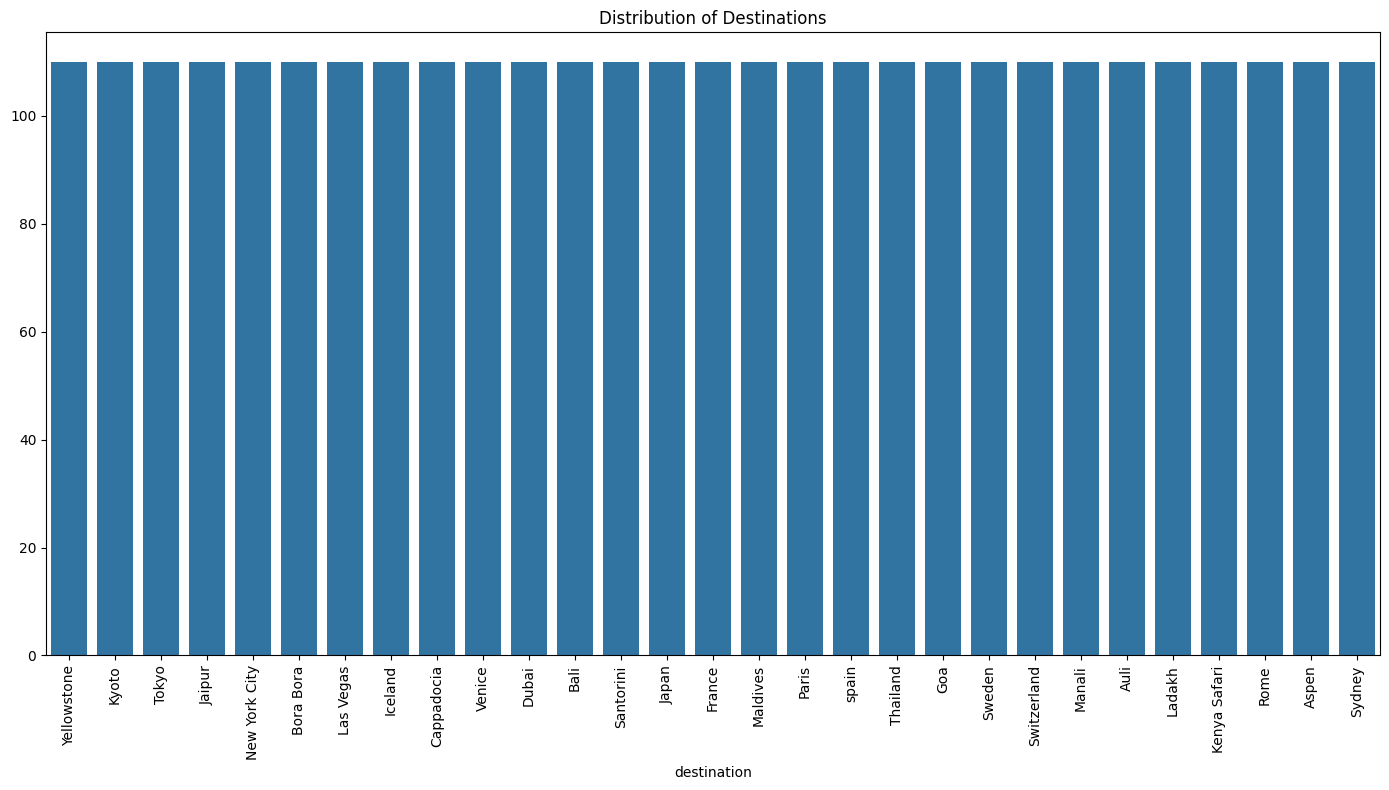

In [5]:
### Distribution of destinations 

plt.figure(figsize=(14, 8))
destination_counts = travel_data['destination'].value_counts()
sns.barplot(x=destination_counts.index, y=destination_counts.values)
plt.title('Distribution of Destinations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



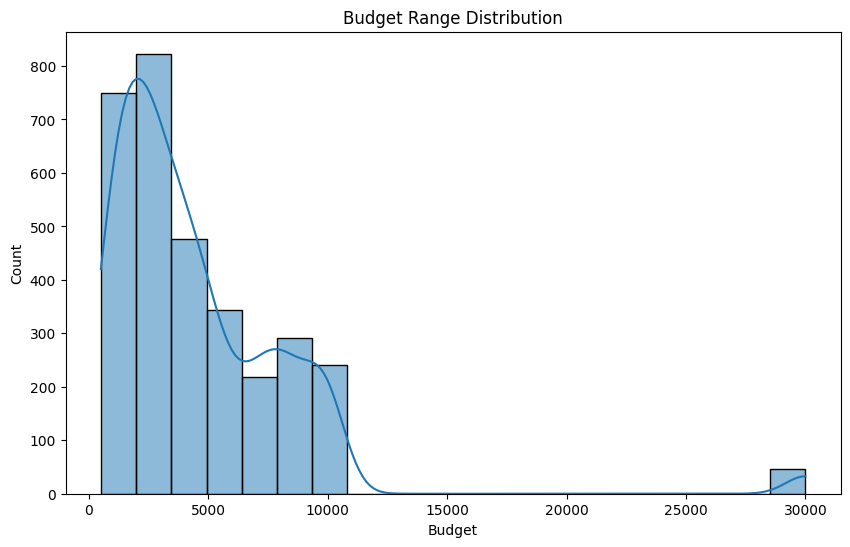

In [6]:
# ### Budget Range Distribution
plt.figure(figsize=(10, 6))
sns.histplot(travel_data['budget_range'], bins=20, kde=True)
plt.title('Budget Range Distribution')
plt.xlabel('Budget')
plt.ylabel('Count')
plt.show()


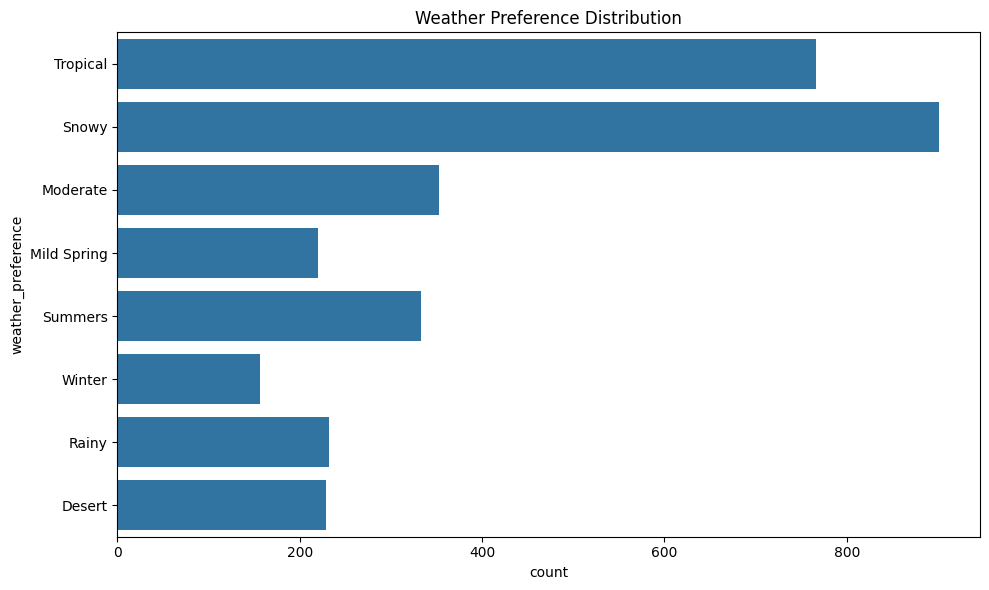

In [7]:
# ### Weather Preference Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=travel_data['weather_preference'])
plt.title('Weather Preference Distribution')
plt.tight_layout()
plt.show()

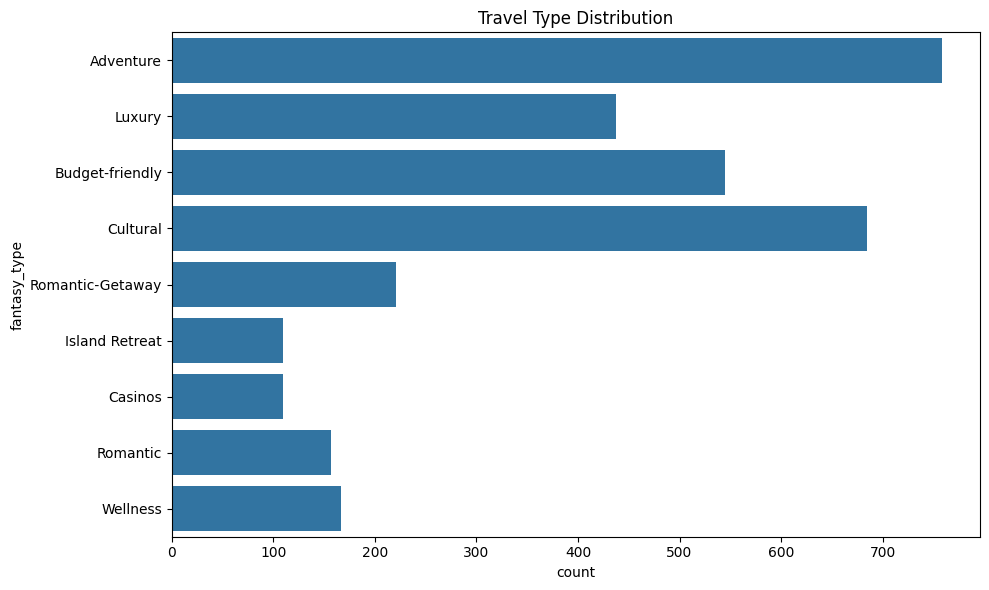

In [8]:
# ### Fantasy Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=travel_data['fantasy_type'])
plt.title('Travel Type Distribution')
plt.tight_layout()
plt.show()

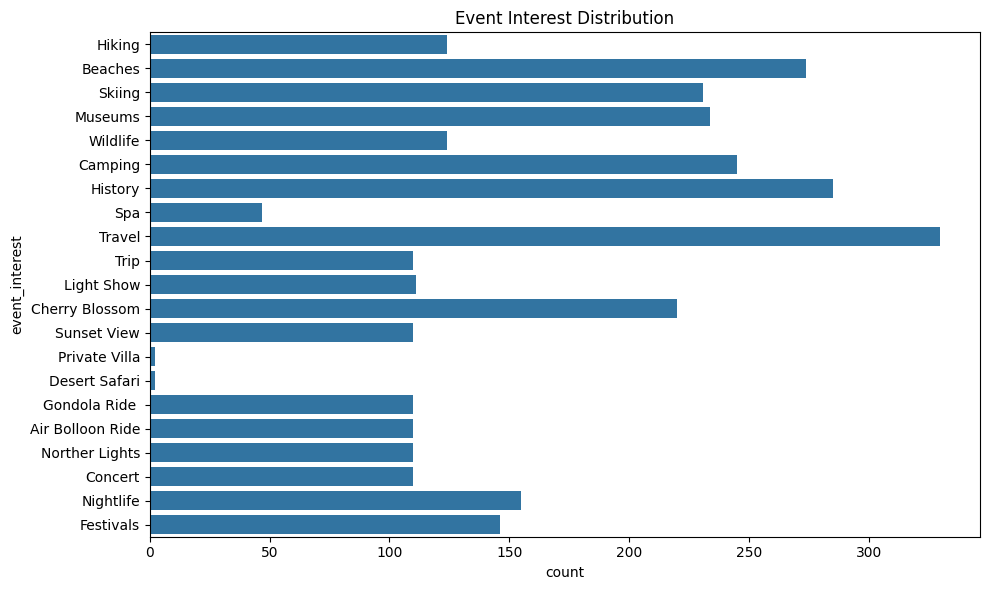

In [9]:
 ### Event Interest Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=travel_data['event_interest'])
plt.title('Event Interest Distribution')
plt.tight_layout()
plt.show()

## Data Processing

In [10]:
categorical_features = ['weather_preference', 'fantasy_type', 'event_interest']
label_encoders = {}  # To store each column’s encoder in case we need to reverse later

for col in categorical_features:
    le = LabelEncoder()
    travel_data[col] = le.fit_transform(travel_data[col])  # Replace text with numeric labels
    label_encoders[col] = le    

In [11]:
## combine numerical and categorical features 
X = travel_data.drop('destination', axis=1)
y = travel_data['destination']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"\nProcessed feature matrix shape: {X.shape}")
X.head()




Processed feature matrix shape: (3190, 4)


,budget_range,weather_preference,fantasy_type,event_interest
0,1000,6,0,8
1,1500,6,5,1
2,8000,4,1,15
3,2000,2,3,11
4,1200,6,0,20


## Spliting For Train and test 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (2552, 4), Test set shape: (638, 4)


## Comparing Multiple Model 


--- Model Comparison with Cross-Validation ---
Random Forest CV Accuracy: 73.20%
XGBoost CV Accuracy: 74.02%


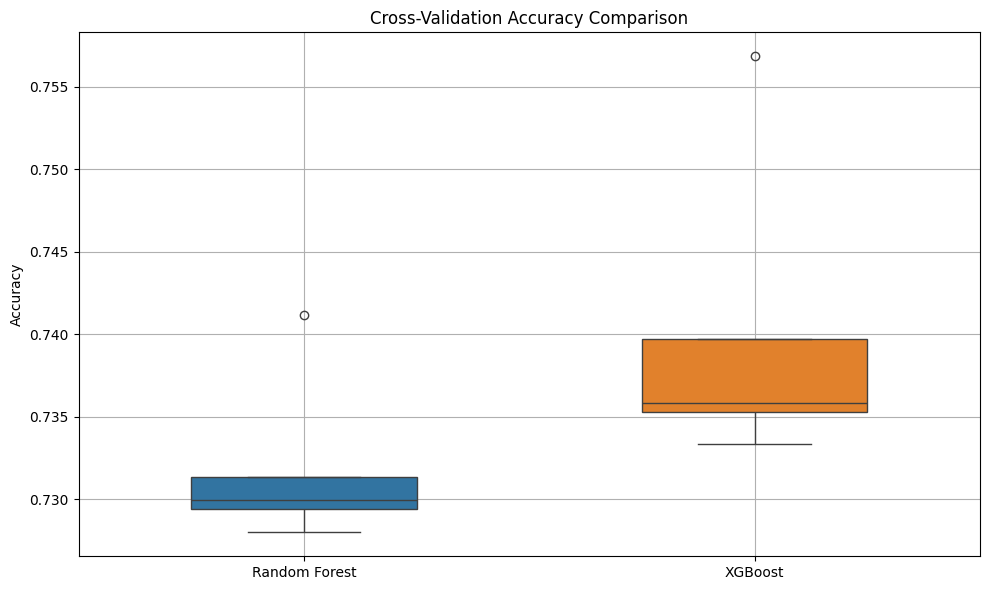

In [13]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

# Cross-validation comparison
print("\n--- Model Comparison with Cross-Validation ---")
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_results[name] = cv_scores
    print(f"{name} CV Accuracy: {cv_scores.mean() * 100:.2f}%")


# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=[cv_results[model] for model in cv_results.keys()], width=0.5)
plt.xticks(range(len(cv_results)), cv_results.keys())
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Comparison')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
model =  XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [15]:
pred = model.predict(X_test)
print("Model Performance:")
print(classification_report(y_test, pred))
print(f"Accuracy: {accuracy_score(y_test,pred):.2f}")

Model Performance:
              precision    recall  f1-score   support

           0       0.11      0.08      0.09        25
           1       0.95      1.00      0.98        20
           2       0.17      0.13      0.15        23
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        24
           5       0.06      0.11      0.08        18
           6       1.00      1.00      1.00        20
           7       0.95      1.00      0.98        21
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        17
          11       0.24      0.12      0.16        32
          12       1.00      1.00      1.00        16
          13       0.95      1.00      0.98        21
          14       1.00      1.00      1.00        18
          15       0.23      0.21      0.22        24
          16       1.00      1.00      1.00        18
        

## Top-K Predictions

In [16]:
def get_top_k_preds(probs, k):
    return np.argsort(probs, axis=1)[:, -k:]

In [17]:
def precision_at_k(y_true, top_k_preds):
    hits = sum(y in top_k for y, top_k in zip(y_true, top_k_preds))
    return hits / len(y_true)


In [18]:
recall_at_k = precision_at_k 


In [19]:
probs = model.predict_proba(X_test)
y_true = y_test  # true labels

top_3 = get_top_k_preds(probs, 3)
top_5 = get_top_k_preds(probs, 5)

p_at_3 = precision_at_k(y_true, top_3)
p_at_5 = precision_at_k(y_true, top_5)

print(f"Precision@3 / Recall@3: {p_at_3:.2f}")
print(f"Precision@5 / Recall@5: {p_at_5:.2f}")


Precision@3 / Recall@3: 0.77
Precision@5 / Recall@5: 0.82


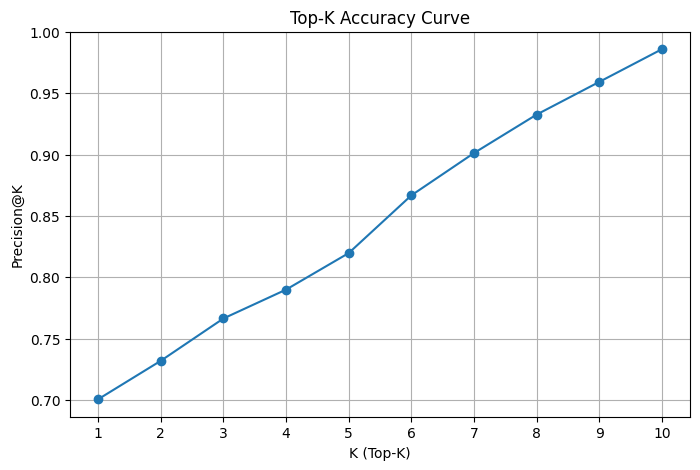

In [20]:
def get_top_k_preds(probs, k):
    return np.argsort(probs, axis=1)[:, -k:]

def precision_at_k(y_true, top_k_preds):
    hits = sum(y in top_k for y, top_k in zip(y_true, top_k_preds))
    return hits / len(y_true)

# Example: compute precision@k for K = 1 to 10
ks = list(range(1, 11))
precisions = []

for k in ks:
    top_k_preds = get_top_k_preds(probs, k)
    prec = precision_at_k(y_test, top_k_preds)
    precisions.append(prec)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(ks, precisions, marker='o')
plt.title("Top-K Accuracy Curve")
plt.xlabel("K (Top-K)")
plt.ylabel("Precision@K")
plt.xticks(ks)
plt.grid(True)
plt.show()


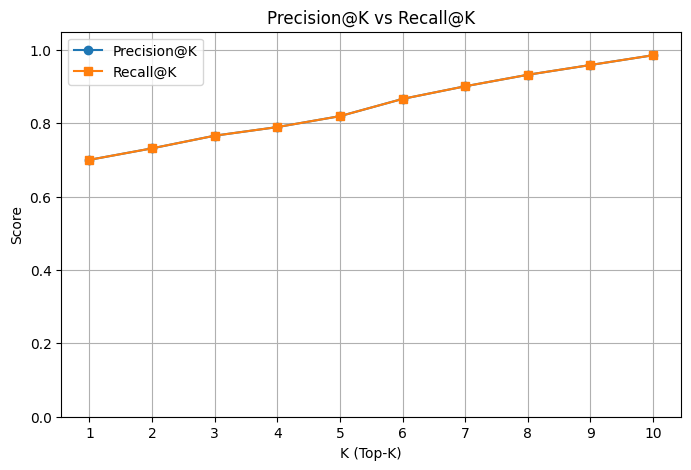

In [21]:


def get_top_k_preds(probs, k):
    return np.argsort(probs, axis=1)[:, -k:]

def precision_at_k(y_true, top_k_preds):
    hits = sum(y in top_k for y, top_k in zip(y_true, top_k_preds))
    return hits / len(y_true)

def recall_at_k(y_true, top_k_preds, y_pred_probs):
    # In Top-1 classification, precision and recall are the same. For Top-K multiclass, recall@K ≈ hits / relevant classes.
    # Here, each sample has only one relevant label, so recall@k ≈ precision@k.
    return precision_at_k(y_true, top_k_preds)  # valid if each sample has only one true class

ks = list(range(1, 11))
precisions = []
recalls = []

for k in ks:
    top_k_preds = get_top_k_preds(probs, k)
    prec = precision_at_k(y_true, top_k_preds)
    rec = recall_at_k(y_true, top_k_preds, probs)
    precisions.append(prec)
    recalls.append(rec)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(ks, precisions, marker='o', label='Precision@K')
plt.plot(ks, recalls, marker='s', label='Recall@K')
plt.xlabel("K (Top-K)")
plt.ylabel("Score")
plt.title("Precision@K vs Recall@K")
plt.legend()
plt.grid(True)
plt.xticks(ks)
plt.ylim(0, 1.05)
plt.show()


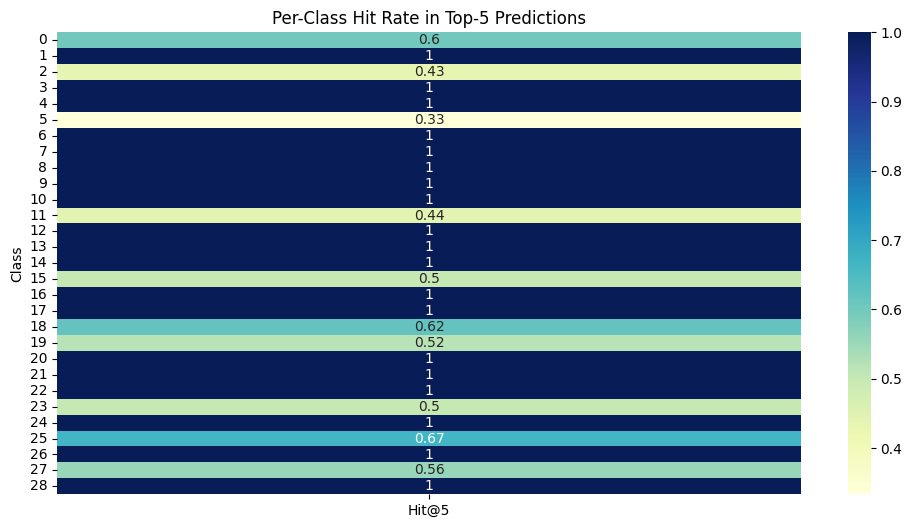

In [22]:
def per_class_topk_hits(y_true, top_k_preds):
    from collections import defaultdict

    class_hits = defaultdict(int)
    class_counts = defaultdict(int)

    for true_label, top_k in zip(y_true, top_k_preds):
        class_counts[true_label] += 1
        if true_label in top_k:
            class_hits[true_label] += 1

    class_hit_rate = {label: class_hits[label] / class_counts[label] for label in class_counts}
    return class_hit_rate

# Calculate hit rate for a chosen K (say K=5)
k = 5
top_k_preds = get_top_k_preds(probs, k)
hit_rate_dict = per_class_topk_hits(y_true, top_k_preds)

# Convert to dataframe for heatmap
df_hit_rate = pd.DataFrame.from_dict(hit_rate_dict, orient='index', columns=[f'Hit@{k}'])
df_hit_rate.index.name = 'Class'

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(df_hit_rate.sort_index(), annot=True, cmap="YlGnBu", cbar=True)
plt.title(f'Per-Class Hit Rate in Top-{k} Predictions')
plt.show()


In [25]:
def recommend_destinations(travel_data, model, label_encoders, k=3):
    
    # Convert input dict to DataFrame
    user_df = pd.DataFrame([travel_data])
    
    # Apply label encoding to categorical features
    for col in user_df.columns:
        if col in label_encoders:
            user_df[col] = label_encoders[col].transform(user_df[col])

    # Predict probabilities
    probs = model.predict_proba(user_df)

    # Get top-k predicted class indices
    top_k_indices = np.argsort(probs[0])[-k:][::-1]

    # Convert back to destination names
    recommended_destinations = le.inverse_transform(top_k_indices)
    
    # Include confidence scores (optional)
    scores = probs[0][top_k_indices]
    result = list(zip(recommended_destinations, scores))
    
    return result


In [26]:
user_input = {
    'budget_range': 1000,
    'weather_preference': 'Tropical',
    'fantasy_type': 'Adventure',
    'event_interest': 'Hiking'
}

top_k = recommend_destinations(user_input, model, label_encoders, k=3)

for i, (place, score) in enumerate(top_k, 1):
    print(f"Top {i}: {place} (Confidence: {score:.2f})")


Top 1: Kenya Safari (Confidence: 0.46)
Top 2: Paris (Confidence: 0.21)
Top 3: Yellowstone (Confidence: 0.10)


In [28]:
with open('xgboost_travel_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [29]:
with open('destination_label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)


In [31]:
with open('feature_label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
